In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Rescaling
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.nn import softmax
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 7.3 MB/s 
     |████████████████████████████████| 1.6 MB 61.0 MB/s 


In [2]:
# # %config Completer.use_jedi = False
# import random as python_random

# def reset_seeds():
#    np.random.seed(10) 
#    python_random.seed(10)
#    tf.random.set_seed(10)

# reset_seeds()

# import warnings
# #ignore by message
# warnings.filterwarnings("ignore", message="Cleanup called...")
# warnings.filterwarnings("ignore", message="Cleanup called... ")
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')


# To Import Data from google drive (authentication needed)
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Articles 
***
# https://www.tensorflow.org/tutorials/images/classification

https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480

https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

https://www.analyticsvidhya.com/blog/2021/08/quick-start-with-tensorflow-callbacks/

https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://medium.com/featurepreneur/data-augmentation-using-keras-preprocessing-layers-6cdc7d49328e

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

https://towardsdatascience.com/mastering-tensorflow-variables-in-5-easy-step-5ba8062a1756

https://towardsdatascience.com/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4|


In [3]:
# To Import Data from google drive (authentication needed)
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



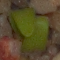

Size of the Images (60, 60)


In [4]:
# Display a image from test set
from PIL import Image
with Image.open( 'gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/Sugar beet/1.png') as im:
    fig = px.imshow(im)
    fig.update_layout(title='An Example of Small-flowered Cranesbill', width=500)
    fig.show()
    images_size = im.size
    print( 'Size of the Images', im.size )


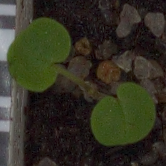

Size of the Images (166, 166)


In [5]:
from PIL import Image
with Image.open( 'gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/Small-flowered Cranesbill/1.png' ) as im:
    fig = px.imshow(im)
    fig.update_layout(title='An Example of Sugar beet', width=500)
    fig.show()
    images_size = im.size
    print( 'Size of the Images', im.size )

In [6]:
# Importing Dataset
train = tf.keras.utils.image_dataset_from_directory( directory="gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/",
                                                    validation_split=0.2, subset="training", seed=10,  batch_size=32)
                                        
val = tf.keras.utils.image_dataset_from_directory( directory="gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/",
                                                    validation_split=0.2, subset="validation", seed=10,  batch_size=32)

Found 5539 files belonging to 14 classes.
Using 4432 files for training.
Found 5539 files belonging to 14 classes.
Using 1107 files for validation.


In [7]:
class_names = train.class_names
no_of_classes = len( class_names )
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'tunned_model_1',
 'tunned_model_2']

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)


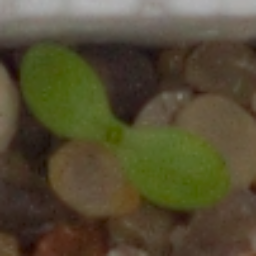


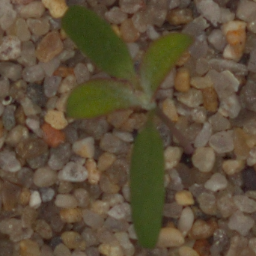


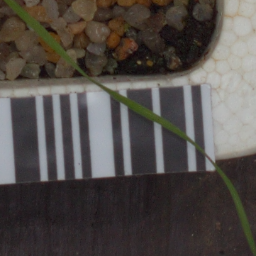


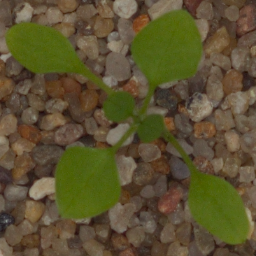


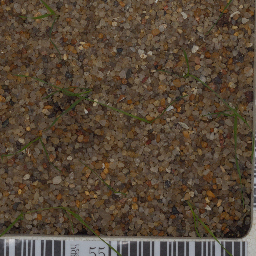

In [9]:
# Display some images from train set
for images,labels in val.take(1):
    for i in range(5):
            fig = px.imshow( images[i] )
            fig.update_layout(width=500,title=class_names[labels[i]])
            fig.show()

## Notation:
 * **24C5** --> convolution layer (24 feature, 5x5 filter and stride 1)
 * **24C5S2** --> convolution layer (24 feature, 5x5 filter and stride 2)
 * **MP2S2** --> max pooling (2x2 filter and stride 2) ( Default (2,2))
 * **256D** --> fully connected dense layer (256 units) 
 

* # To see entire code, remove # from the cells (to get Code Format)

## Step 1: Estimate Number of Convolution Layers required
* 1)  256*256*3-50C3MP2-F-150D-4D-Compile
* 2)  256*256*3-50C3MP2-30C3MP2-F-150D-4D-Compile
* 3)  256*256*3-50C3MP2-30C3MP2-20C3MP2-F-150D-4D-Compile
* 4)  256*256*3-50C3MP2-40C3MP2-30C3MP2-20C3MP2-F-150D-4D-Compile

In [10]:
model_1 = Sequential()
model_1.add( Conv2D( filters=20 ,kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( MaxPooling2D() ) 

model_1.add( Flatten() )
model_1.add( Dense(units=256,activation='relu') )
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 20)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 327680)            0         
                                                                 
 dense (Dense)               (None, 256)               83886336  
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 83,889,980
Trainable params: 83,889,980
Non-trainable params: 0
____________________________________________

In [11]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 2265s 3s/step - loss: 1104.3999 - accuracy: 0.2633 - val_loss: 3.6014 - val_accuracy: 0.3532
Epoch 2/15
139/139 [==============================] - 7s 50ms/step - loss: 1.8275 - accuracy: 0.5054 - val_loss: 2.6648 - val_accuracy: 0.3532
Epoch 3/15
139/139 [==============================] - 7s 49ms/step - loss: 1.0411 - accuracy: 0.6740 - val_loss: 2.8743 - val_accuracy: 0.4047
Epoch 4/15
139/139 [==============================] - 7s 50ms/step - loss: 0.7117 - accuracy: 0.7759 - val_loss: 3.9250 - val_accuracy: 0.4011
Epoch 5/15
139/139 [==============================] - 7s 50ms/step - loss: 0.5036 - accuracy: 0.8513 - val_loss: 3.9056 - val_accuracy: 0.4246
Epoch 6/15
139/139 [==============================] - 7s 49ms/step - loss: 0.3160 - accuracy: 0.9113 - val_loss: 3.5633 - val_accuracy: 0.3731
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 0.1988 - accuracy: 0.9458 - val_loss: 5.0924 - val_accuracy: 0.

In [12]:
model_2 = Sequential()
model_2.add( Conv2D( filters=20, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( MaxPooling2D() )
model_2.add( Conv2D( filters=30, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )

model_2.add( Flatten() )
model_2.add( Dense(units=256,activation='relu') )
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 20)      560       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 20)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 30)      5430      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 30)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 122880)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [13]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 52ms/step - loss: 76.5708 - accuracy: 0.2335 - val_loss: 1.8547 - val_accuracy: 0.3695
Epoch 2/15
139/139 [==============================] - 7s 50ms/step - loss: 1.3229 - accuracy: 0.5787 - val_loss: 1.2596 - val_accuracy: 0.5827
Epoch 3/15
139/139 [==============================] - 7s 50ms/step - loss: 0.5535 - accuracy: 0.8328 - val_loss: 1.4233 - val_accuracy: 0.5908
Epoch 4/15
139/139 [==============================] - 7s 49ms/step - loss: 0.2126 - accuracy: 0.9380 - val_loss: 1.5043 - val_accuracy: 0.6278
Epoch 5/15
139/139 [==============================] - 7s 50ms/step - loss: 0.0867 - accuracy: 0.9763 - val_loss: 1.6206 - val_accuracy: 0.6233
Epoch 6/15
139/139 [==============================] - 7s 49ms/step - loss: 0.0506 - accuracy: 0.9849 - val_loss: 1.7630 - val_accuracy: 0.6287
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 0.0312 - accuracy: 0.9932 - val_loss: 2.0593 - val_accuracy: 0.625

In [14]:
model_3 = Sequential()
model_3.add( Conv2D( filters=20, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=30, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=40, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )

model_3.add( Flatten() )
model_3.add( Dense(units=256,activation='relu') )
model_3.add( Dense(units=12, activation='softmax') )
model_3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 20)      560       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 20)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 30)      5430      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 40)        10840     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 40)      

In [15]:
model_3.fit( train, validation_data=val, epochs=15)

Epoch 1/15
139/139 [==============================] - 8s 51ms/step - loss: 20.7889 - accuracy: 0.1230 - val_loss: 2.4311 - val_accuracy: 0.1364
Epoch 2/15
139/139 [==============================] - 7s 49ms/step - loss: 2.2104 - accuracy: 0.2432 - val_loss: 1.6622 - val_accuracy: 0.4797
Epoch 3/15
139/139 [==============================] - 7s 49ms/step - loss: 1.4571 - accuracy: 0.5203 - val_loss: 1.3133 - val_accuracy: 0.5565
Epoch 4/15
139/139 [==============================] - 7s 49ms/step - loss: 0.9976 - accuracy: 0.6645 - val_loss: 1.1964 - val_accuracy: 0.6323
Epoch 5/15
139/139 [==============================] - 7s 49ms/step - loss: 0.6590 - accuracy: 0.7744 - val_loss: 1.2108 - val_accuracy: 0.6323
Epoch 6/15
139/139 [==============================] - 7s 49ms/step - loss: 0.4530 - accuracy: 0.8554 - val_loss: 1.3780 - val_accuracy: 0.6152
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 0.3217 - accuracy: 0.8942 - val_loss: 1.4548 - val_accuracy: 0.650

In [16]:
model_4 = Sequential()
model_4.add( Conv2D( filters=20, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=30, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=40, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=50, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )

model_4.add( Flatten() )
model_4.add( Dense(units=256,activation='relu') )
model_4.add( Dense(units=12, activation='softmax') )
model_4.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 20)      560       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 20)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 30)      5430      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 30)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 40)        10840     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 40)      

In [17]:
model_4.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 50ms/step - loss: 4.4243 - accuracy: 0.1383 - val_loss: 2.4094 - val_accuracy: 0.1301
Epoch 2/15
139/139 [==============================] - 7s 48ms/step - loss: 2.3960 - accuracy: 0.1383 - val_loss: 2.3382 - val_accuracy: 0.1536
Epoch 3/15
139/139 [==============================] - 7s 48ms/step - loss: 1.9642 - accuracy: 0.3439 - val_loss: 1.5706 - val_accuracy: 0.4625
Epoch 4/15
139/139 [==============================] - 7s 48ms/step - loss: 1.1742 - accuracy: 0.6128 - val_loss: 1.0767 - val_accuracy: 0.6360
Epoch 5/15
139/139 [==============================] - 7s 48ms/step - loss: 0.7371 - accuracy: 0.7579 - val_loss: 1.0192 - val_accuracy: 0.6766
Epoch 6/15
139/139 [==============================] - 7s 48ms/step - loss: 0.4354 - accuracy: 0.8547 - val_loss: 0.8930 - val_accuracy: 0.7371
Epoch 7/15
139/139 [==============================] - 7s 48ms/step - loss: 0.2896 - accuracy: 0.9025 - val_loss: 1.1484 - val_accuracy: 0.7118

In [18]:
model_5 = Sequential()
model_5.add( Conv2D( filters=20, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=30, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=40, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=50, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=60, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )

model_5.add( Flatten() )
model_5.add( Dense(units=256,activation='relu') )
model_5.add( Dense(units=12, activation='softmax') )
model_5.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 20)      560       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 30)      5430      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 40)        10840     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 40)      

In [19]:
model_5.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 50ms/step - loss: 2.3830 - accuracy: 0.3621 - val_loss: 1.1589 - val_accuracy: 0.6215
Epoch 2/15
139/139 [==============================] - 7s 48ms/step - loss: 0.9708 - accuracy: 0.6785 - val_loss: 0.7925 - val_accuracy: 0.7398
Epoch 3/15
139/139 [==============================] - 7s 48ms/step - loss: 0.6383 - accuracy: 0.7825 - val_loss: 0.7117 - val_accuracy: 0.7453
Epoch 4/15
139/139 [==============================] - 7s 48ms/step - loss: 0.5059 - accuracy: 0.8321 - val_loss: 0.6860 - val_accuracy: 0.7669
Epoch 5/15
139/139 [==============================] - 7s 48ms/step - loss: 0.3373 - accuracy: 0.8824 - val_loss: 0.6395 - val_accuracy: 0.7904
Epoch 6/15
139/139 [==============================] - 7s 48ms/step - loss: 0.2461 - accuracy: 0.9149 - val_loss: 0.5990 - val_accuracy: 0.8175
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 0.2003 - accuracy: 0.9296 - val_loss: 0.6671 - val_accuracy: 0.8040

#### * Result : As we increase the number of Convolution Layers, the accuracy increases. But we will choose model_3 keeping computation cost in mind

## Step 2: Estimate Number of Feature Maps

In [20]:
model_1 = Sequential()
model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( MaxPooling2D() )
model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D() )
model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D() )

model_1.add( Flatten() )
model_1.add( Dense(units=256,activation='relu') )
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)      

In [21]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 45ms/step - loss: 27.6514 - accuracy: 0.1361 - val_loss: 2.3863 - val_accuracy: 0.1644
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3344 - accuracy: 0.1893 - val_loss: 2.3569 - val_accuracy: 0.1599
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.1210 - accuracy: 0.2658 - val_loss: 2.4272 - val_accuracy: 0.1825
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 1.7209 - accuracy: 0.4276 - val_loss: 2.4211 - val_accuracy: 0.3261
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 0.9593 - accuracy: 0.6954 - val_loss: 2.7837 - val_accuracy: 0.4047
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 0.4456 - accuracy: 0.8655 - val_loss: 2.9661 - val_accuracy: 0.3677
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 0.1871 - accuracy: 0.9490 - val_loss: 4.0845 - val_accuracy: 0.377

In [22]:
model_2 = Sequential()
model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( MaxPooling2D() )
model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )
model_2.add( Conv2D( filters=64, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )

model_2.add( Flatten() )
model_2.add( Dense(units=256,activation='relu') )
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 64)      

In [23]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 49ms/step - loss: 12.9137 - accuracy: 0.3256 - val_loss: 1.5724 - val_accuracy: 0.4959
Epoch 2/15
139/139 [==============================] - 6s 45ms/step - loss: 1.2305 - accuracy: 0.5871 - val_loss: 1.2647 - val_accuracy: 0.5917
Epoch 3/15
139/139 [==============================] - 6s 45ms/step - loss: 0.7387 - accuracy: 0.7489 - val_loss: 1.7236 - val_accuracy: 0.5384
Epoch 4/15
139/139 [==============================] - 6s 45ms/step - loss: 0.4955 - accuracy: 0.8425 - val_loss: 1.5876 - val_accuracy: 0.5754
Epoch 5/15
139/139 [==============================] - 6s 45ms/step - loss: 0.2629 - accuracy: 0.9194 - val_loss: 1.7604 - val_accuracy: 0.6107
Epoch 6/15
139/139 [==============================] - 6s 45ms/step - loss: 0.1592 - accuracy: 0.9524 - val_loss: 2.0313 - val_accuracy: 0.6170
Epoch 7/15
139/139 [==============================] - 6s 45ms/step - loss: 0.1127 - accuracy: 0.9686 - val_loss: 1.9729 - val_accuracy: 0.614

In [24]:
model_3 = Sequential()
model_3.add( Conv2D( filters=24, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=48, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=72, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )

model_3.add( Flatten() )
model_3.add( Dense(units=256,activation='relu') )
model_3.add( Dense(units=12, activation='softmax') )
model_3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 24)      672       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 128, 128, 24)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 48)      10416     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 72)        31176     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 72)      

In [25]:
model_3.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 11s 67ms/step - loss: 36.3985 - accuracy: 0.3662 - val_loss: 1.4428 - val_accuracy: 0.5303
Epoch 2/15
139/139 [==============================] - 8s 61ms/step - loss: 1.3620 - accuracy: 0.5481 - val_loss: 1.4779 - val_accuracy: 0.5330
Epoch 3/15
139/139 [==============================] - 8s 60ms/step - loss: 1.0653 - accuracy: 0.6397 - val_loss: 1.3036 - val_accuracy: 0.5998
Epoch 4/15
139/139 [==============================] - 8s 60ms/step - loss: 0.8189 - accuracy: 0.7155 - val_loss: 1.2218 - val_accuracy: 0.5944
Epoch 5/15
139/139 [==============================] - 8s 61ms/step - loss: 0.6832 - accuracy: 0.7608 - val_loss: 1.2492 - val_accuracy: 0.6116
Epoch 6/15
139/139 [==============================] - 8s 60ms/step - loss: 0.5670 - accuracy: 0.8019 - val_loss: 1.4993 - val_accuracy: 0.5845
Epoch 7/15
139/139 [==============================] - 8s 60ms/step - loss: 0.5247 - accuracy: 0.8150 - val_loss: 1.5944 - val_accuracy: 0.59

In [26]:
model_4 = Sequential()
model_4.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=64, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=128, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )

model_4.add( Flatten() )
model_4.add( Dense(units=256,activation='relu') )
model_4.add( Dense(units=12, activation='softmax') )
model_4.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 128)     

In [27]:
model_4.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 13s 86ms/step - loss: 20.4282 - accuracy: 0.1295 - val_loss: 2.4242 - val_accuracy: 0.1436
Epoch 2/15
139/139 [==============================] - 11s 80ms/step - loss: 2.4233 - accuracy: 0.1354 - val_loss: 2.4211 - val_accuracy: 0.1436
Epoch 3/15
139/139 [==============================] - 11s 82ms/step - loss: 2.4211 - accuracy: 0.1313 - val_loss: 2.4215 - val_accuracy: 0.1472
Epoch 4/15
139/139 [==============================] - 12s 83ms/step - loss: 2.4112 - accuracy: 0.1392 - val_loss: 2.4180 - val_accuracy: 0.1391
Epoch 5/15
139/139 [==============================] - 11s 82ms/step - loss: 2.4028 - accuracy: 0.1485 - val_loss: 2.4182 - val_accuracy: 0.1265
Epoch 6/15
139/139 [==============================] - 11s 82ms/step - loss: 2.3910 - accuracy: 0.1532 - val_loss: 2.4138 - val_accuracy: 0.1436
Epoch 7/15
139/139 [==============================] - 12s 83ms/step - loss: 2.3664 - accuracy: 0.1588 - val_loss: 2.4266 - val_accuracy

In [28]:
model_5 = Sequential()
model_5.add( Conv2D( filters=48, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=96, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=120, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )

model_5.add( Flatten() )
model_5.add( Dense(units=256,activation='relu') )
model_5.add( Dense(units=12, activation='softmax') )
model_5.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 256, 256, 48)      1344      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 128, 128, 48)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 96)      41568     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 64, 64, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 120)       103800    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 32, 32, 120)     

In [29]:
model_5.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 20s 127ms/step - loss: 17.6434 - accuracy: 0.1232 - val_loss: 2.4209 - val_accuracy: 0.1400
Epoch 2/15
139/139 [==============================] - 16s 115ms/step - loss: 2.4179 - accuracy: 0.1354 - val_loss: 2.4204 - val_accuracy: 0.1156
Epoch 3/15
139/139 [==============================] - 16s 115ms/step - loss: 2.4058 - accuracy: 0.1401 - val_loss: 2.4214 - val_accuracy: 0.1382
Epoch 4/15
139/139 [==============================] - 16s 116ms/step - loss: 2.3761 - accuracy: 0.1498 - val_loss: 2.4268 - val_accuracy: 0.1454
Epoch 5/15
139/139 [==============================] - 16s 116ms/step - loss: 2.3127 - accuracy: 0.1848 - val_loss: 2.4065 - val_accuracy: 0.1192
Epoch 6/15
139/139 [==============================] - 16s 116ms/step - loss: 2.1808 - accuracy: 0.2356 - val_loss: 2.5688 - val_accuracy: 0.1590
Epoch 7/15
139/139 [==============================] - 16s 116ms/step - loss: 2.0001 - accuracy: 0.3141 - val_loss: 3.4207 - val_a

#### * Accuracy provided by the model_1 is beter than the other models, we will choose model_1 setup for futher process

## Step 3: Estimate the number of feature in Dense Layer

In [30]:
model_1 = Sequential()
model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( MaxPooling2D() )
model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D() )
model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D() )

model_1.add( Flatten() )
model_1.add( Dense(units=16,activation='relu') )
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 32)     

In [31]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 45ms/step - loss: 7.7556 - accuracy: 0.1309 - val_loss: 2.4681 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 6s 45ms/step - loss: 2.4614 - accuracy: 0.1363 - val_loss: 2.4528 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 44ms/step - loss: 2.4485 - accuracy: 0.1363 - val_loss: 2.4409 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 44ms/step - loss: 2.4391 - accuracy: 0.1363 - val_loss: 2.4323 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 44ms/step - loss: 2.4322 - accuracy: 0.1363 - val_loss: 2.4264 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 45ms/step - loss: 2.4274 - accuracy: 0.1363 - val_loss: 2.4222 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 44ms/step - loss: 2.4240 - accuracy: 0.1363 - val_loss: 2.4193 - val_accuracy: 0.1427

In [32]:
model_2 = Sequential()
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( MaxPooling2D() )
model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )
model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )

model_2.add( Flatten() )
model_2.add( Dense(units=32,activation='relu') )
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 32, 32, 32)     

In [33]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 45ms/step - loss: 11.9216 - accuracy: 0.1295 - val_loss: 2.4728 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4661 - accuracy: 0.1363 - val_loss: 2.4590 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4536 - accuracy: 0.1363 - val_loss: 2.4473 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 40ms/step - loss: 2.4437 - accuracy: 0.1363 - val_loss: 2.4384 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4361 - accuracy: 0.1363 - val_loss: 2.4316 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4304 - accuracy: 0.1363 - val_loss: 2.4264 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 40ms/step - loss: 2.4262 - accuracy: 0.1363 - val_loss: 2.4227 - val_accuracy: 0.142

In [34]:
model_3 = Sequential()
model_3.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )
model_3.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )

model_3.add( Flatten() )
model_3.add( Dense(units=64,activation='relu') )
model_3.add( Dense(units=12, activation='softmax') )
model_3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 32, 32, 32)     

In [35]:
model_3.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 41ms/step - loss: 5.7709 - accuracy: 0.1151 - val_loss: 2.4213 - val_accuracy: 0.1292
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 2.3905 - accuracy: 0.1354 - val_loss: 2.3965 - val_accuracy: 0.1292
Epoch 3/15
139/139 [==============================] - 6s 40ms/step - loss: 2.3378 - accuracy: 0.1622 - val_loss: 2.4862 - val_accuracy: 0.1265
Epoch 4/15
139/139 [==============================] - 6s 40ms/step - loss: 2.2567 - accuracy: 0.1972 - val_loss: 2.4335 - val_accuracy: 0.1599
Epoch 5/15
139/139 [==============================] - 6s 40ms/step - loss: 2.1266 - accuracy: 0.2642 - val_loss: 2.4066 - val_accuracy: 0.1843
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 1.9206 - accuracy: 0.3542 - val_loss: 2.4145 - val_accuracy: 0.2818
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 1.6715 - accuracy: 0.4474 - val_loss: 2.3438 - val_accuracy: 0.3162

In [36]:
model_4 = Sequential()
model_4.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )
model_4.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )

model_4.add( Flatten() )
model_4.add( Dense(units=128,activation='relu') )
model_4.add( Dense(units=12, activation='softmax') )
model_4.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 32, 32, 32)     

In [37]:
model_4.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 18.3676 - accuracy: 0.1207 - val_loss: 2.4262 - val_accuracy: 0.1409
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4118 - accuracy: 0.1516 - val_loss: 2.4233 - val_accuracy: 0.1030
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 2.3274 - accuracy: 0.1904 - val_loss: 2.4021 - val_accuracy: 0.1617
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 2.1428 - accuracy: 0.2775 - val_loss: 2.4479 - val_accuracy: 0.1500
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 1.7929 - accuracy: 0.4023 - val_loss: 2.7567 - val_accuracy: 0.1771
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 1.3388 - accuracy: 0.5684 - val_loss: 3.2607 - val_accuracy: 0.1762
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 0.8945 - accuracy: 0.7166 - val_loss: 3.7189 - val_accuracy: 0.168

In [41]:
model_5 = Sequential()
model_5.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )

model_5.add( Flatten() )
model_5.add( Dense(units=256,activation='relu') )
model_5.add( Dense(units=12, activation='softmax') )
model_5.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 32, 32, 32)     

In [42]:
model_5.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 57.4711 - accuracy: 0.1302 - val_loss: 2.3936 - val_accuracy: 0.1527
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 2.1719 - accuracy: 0.2608 - val_loss: 2.4118 - val_accuracy: 0.1789
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 1.4255 - accuracy: 0.5472 - val_loss: 1.8329 - val_accuracy: 0.3857
Epoch 4/15
139/139 [==============================] - 6s 43ms/step - loss: 0.4426 - accuracy: 0.8630 - val_loss: 2.4566 - val_accuracy: 0.4029
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 0.1089 - accuracy: 0.9750 - val_loss: 2.5067 - val_accuracy: 0.4743
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 0.0313 - accuracy: 0.9944 - val_loss: 2.7483 - val_accuracy: 0.4598
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 0.0050 - accuracy: 0.9998 - val_loss: 2.9567 - val_accuracy: 0.457

In [43]:
model_6 = Sequential()
model_6.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_6.add( MaxPooling2D() )
model_6.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_6.add( MaxPooling2D() )
model_6.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_6.add( MaxPooling2D() )

model_6.add( Flatten() )
model_6.add( Dense(units=512,activation='relu') )
model_6.add( Dense(units=12, activation='softmax') )
model_6.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 32, 32, 32)     

In [44]:
model_6.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 44ms/step - loss: 23.7202 - accuracy: 0.3982 - val_loss: 1.4322 - val_accuracy: 0.5438
Epoch 2/15
139/139 [==============================] - 6s 44ms/step - loss: 0.8456 - accuracy: 0.7295 - val_loss: 1.1174 - val_accuracy: 0.6567
Epoch 3/15
139/139 [==============================] - 6s 43ms/step - loss: 0.4004 - accuracy: 0.8716 - val_loss: 1.1447 - val_accuracy: 0.6549
Epoch 4/15
139/139 [==============================] - 6s 43ms/step - loss: 0.1656 - accuracy: 0.9531 - val_loss: 1.4048 - val_accuracy: 0.6585
Epoch 5/15
139/139 [==============================] - 6s 44ms/step - loss: 0.0584 - accuracy: 0.9840 - val_loss: 1.4257 - val_accuracy: 0.6766
Epoch 6/15
139/139 [==============================] - 6s 43ms/step - loss: 0.0434 - accuracy: 0.9914 - val_loss: 1.4793 - val_accuracy: 0.7100
Epoch 7/15
139/139 [==============================] - 6s 43ms/step - loss: 0.0559 - accuracy: 0.9860 - val_loss: 1.6374 - val_accuracy: 0.682

In [45]:
model_7 = Sequential()
model_7.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_7.add( MaxPooling2D() )
model_7.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_7.add( MaxPooling2D() )
model_7.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_7.add( MaxPooling2D() )

model_7.add( Flatten() )
model_7.add( Dense(units=1024,activation='relu') )
model_7.add( Dense(units=12, activation='softmax') )
model_7.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_7.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 32, 32, 32)     

In [46]:
model_7.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 48ms/step - loss: 37.6134 - accuracy: 0.1322 - val_loss: 2.4183 - val_accuracy: 0.1590
Epoch 2/15
139/139 [==============================] - 7s 48ms/step - loss: 2.3417 - accuracy: 0.1825 - val_loss: 2.4007 - val_accuracy: 0.1725
Epoch 3/15
139/139 [==============================] - 7s 47ms/step - loss: 2.1529 - accuracy: 0.2498 - val_loss: 2.4987 - val_accuracy: 0.1843
Epoch 4/15
139/139 [==============================] - 7s 47ms/step - loss: 1.9038 - accuracy: 0.3574 - val_loss: 2.6393 - val_accuracy: 0.1807
Epoch 5/15
139/139 [==============================] - 7s 47ms/step - loss: 1.6880 - accuracy: 0.4364 - val_loss: 3.1714 - val_accuracy: 0.1807
Epoch 6/15
139/139 [==============================] - 7s 47ms/step - loss: 1.3339 - accuracy: 0.5704 - val_loss: 3.5274 - val_accuracy: 0.1897
Epoch 7/15
139/139 [==============================] - 7s 47ms/step - loss: 1.0106 - accuracy: 0.6870 - val_loss: 3.8347 - val_accuracy: 0.280

In [47]:
model_8 = Sequential()
model_8.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_8.add( MaxPooling2D() )
model_8.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_8.add( MaxPooling2D() )
model_8.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_8.add( MaxPooling2D() )

model_8.add( Flatten() )
model_8.add( Dense(units=2048,activation='relu') )
model_8.add( Dense(units=12, activation='softmax') )
model_8.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_8.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 32, 32, 32)     

In [48]:
model_8.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 57ms/step - loss: 79.1045 - accuracy: 0.1282 - val_loss: 2.3917 - val_accuracy: 0.1509
Epoch 2/15
139/139 [==============================] - 8s 56ms/step - loss: 2.3401 - accuracy: 0.1816 - val_loss: 2.4039 - val_accuracy: 0.1527
Epoch 3/15
139/139 [==============================] - 8s 56ms/step - loss: 2.2008 - accuracy: 0.2351 - val_loss: 2.4357 - val_accuracy: 0.1590
Epoch 4/15
139/139 [==============================] - 8s 56ms/step - loss: 2.0384 - accuracy: 0.2935 - val_loss: 2.8470 - val_accuracy: 0.1545
Epoch 5/15
139/139 [==============================] - 8s 56ms/step - loss: 1.8587 - accuracy: 0.3646 - val_loss: 2.8919 - val_accuracy: 0.1671
Epoch 6/15
139/139 [==============================] - 8s 56ms/step - loss: 1.6091 - accuracy: 0.4691 - val_loss: 3.7973 - val_accuracy: 0.1400
Epoch 7/15
139/139 [==============================] - 8s 56ms/step - loss: 1.3324 - accuracy: 0.5697 - val_loss: 4.5686 - val_accuracy: 0.132

#### * Accuracy provided by the model_3 is stable and better than the other models, we will choose model_3 setup for futher process

## Step 4: Add Dropout Layer and estimate the percentage of dropout required and trying L1, L2 Regularization

In [49]:
model_1 = Sequential()

model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( MaxPooling2D() )
model_1.add( Dropout(0.1) )

model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D())
model_1.add( Dropout(0.1) )

model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( MaxPooling2D() )
model_1.add( Dropout(0.1) )

model_1.add( Flatten() )
model_1.add( Dense(units=64,activation='relu') )
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 32, 32, 32)     

In [50]:
model_2 = Sequential()

model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( MaxPooling2D() )
model_2.add( Dropout(0.1) )

model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D())
model_2.add( Dropout(0.1) )

model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )
model_2.add( Dropout(0.1) )

model_2.add( Flatten() )
model_2.add( Dense(units=64,activation='relu') )
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 conv2d_61 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 16)      

In [51]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 43ms/step - loss: 30.8406 - accuracy: 0.1807 - val_loss: 2.2518 - val_accuracy: 0.3207
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.0314 - accuracy: 0.3567 - val_loss: 2.1307 - val_accuracy: 0.3035
Epoch 3/15
139/139 [==============================] - 6s 43ms/step - loss: 1.6569 - accuracy: 0.4531 - val_loss: 1.8022 - val_accuracy: 0.3975
Epoch 4/15
139/139 [==============================] - 6s 42ms/step - loss: 1.2580 - accuracy: 0.5860 - val_loss: 1.6415 - val_accuracy: 0.4417
Epoch 5/15
139/139 [==============================] - 6s 43ms/step - loss: 1.0587 - accuracy: 0.6546 - val_loss: 1.6294 - val_accuracy: 0.4517
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 0.9074 - accuracy: 0.7062 - val_loss: 1.6116 - val_accuracy: 0.4417
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 0.7741 - accuracy: 0.7507 - val_loss: 1.5863 - val_accuracy: 0.463

In [52]:
model_2 = Sequential()

model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( MaxPooling2D() )
model_2.add( Dropout(0.2) )

model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D())
model_2.add( Dropout(0.2) )

model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_2.add( MaxPooling2D() )
model_2.add( Dropout(0.2) )

model_2.add( Flatten() )
model_2.add( Dense(units=64,activation='relu') )
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64, 64, 16)      

In [53]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 44ms/step - loss: 62.7499 - accuracy: 0.1067 - val_loss: 2.4540 - val_accuracy: 0.1283
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4493 - accuracy: 0.1252 - val_loss: 2.4544 - val_accuracy: 0.1409
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4396 - accuracy: 0.1311 - val_loss: 2.4457 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 43ms/step - loss: 2.4322 - accuracy: 0.1372 - val_loss: 2.4432 - val_accuracy: 0.1436
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4327 - accuracy: 0.1347 - val_loss: 2.4471 - val_accuracy: 0.1436
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4277 - accuracy: 0.1293 - val_loss: 2.4420 - val_accuracy: 0.1445
Epoch 7/15
139/139 [==============================] - 6s 43ms/step - loss: 2.4215 - accuracy: 0.1421 - val_loss: 2.4423 - val_accuracy: 0.144

In [54]:
model_3 = Sequential()

model_3.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_3.add( MaxPooling2D() )
model_3.add( Dropout(0.3) )

model_3.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D())
model_3.add( Dropout(0.3) )

model_3.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_3.add( MaxPooling2D() )
model_3.add( Dropout(0.3) )

model_3.add( Flatten() )
model_3.add( Dense(units=64,activation='relu') )
model_3.add( Dense(units=12, activation='softmax') )
model_3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 conv2d_67 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 64, 64, 16)      

In [55]:
model_3.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 43ms/step - loss: 19.8409 - accuracy: 0.1476 - val_loss: 2.4667 - val_accuracy: 0.1635
Epoch 2/15
139/139 [==============================] - 6s 43ms/step - loss: 2.3875 - accuracy: 0.1767 - val_loss: 2.4542 - val_accuracy: 0.1536
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3347 - accuracy: 0.2026 - val_loss: 2.4524 - val_accuracy: 0.1418
Epoch 4/15
139/139 [==============================] - 6s 43ms/step - loss: 2.2782 - accuracy: 0.2270 - val_loss: 2.4126 - val_accuracy: 0.1969
Epoch 5/15
139/139 [==============================] - 6s 43ms/step - loss: 2.2401 - accuracy: 0.2376 - val_loss: 2.3145 - val_accuracy: 0.2304
Epoch 6/15
139/139 [==============================] - 6s 43ms/step - loss: 2.1934 - accuracy: 0.2477 - val_loss: 2.2427 - val_accuracy: 0.2484
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.1227 - accuracy: 0.2902 - val_loss: 2.1536 - val_accuracy: 0.290

In [56]:
model_4 = Sequential()

model_4.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_4.add( MaxPooling2D() )
model_4.add( Dropout(0.4) )

model_4.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D())
model_4.add( Dropout(0.4) )

model_4.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_4.add( MaxPooling2D() )
model_4.add( Dropout(0.4) )

model_4.add( Flatten() )
model_4.add( Dense(units=64,activation='relu') )
model_4.add( Dense(units=12, activation='softmax') )
model_4.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_4.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 conv2d_70 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 16)      

In [57]:
model_4.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 43ms/step - loss: 60.3580 - accuracy: 0.1074 - val_loss: 2.4763 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4708 - accuracy: 0.1345 - val_loss: 2.4629 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4594 - accuracy: 0.1327 - val_loss: 2.4513 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4491 - accuracy: 0.1365 - val_loss: 2.4414 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4405 - accuracy: 0.1367 - val_loss: 2.4340 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 43ms/step - loss: 2.4344 - accuracy: 0.1358 - val_loss: 2.4282 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4298 - accuracy: 0.1363 - val_loss: 2.4240 - val_accuracy: 0.142

In [58]:
model_5 = Sequential()

model_5.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_5.add( MaxPooling2D() )
model_5.add( Dropout(0.5) )

model_5.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D())
model_5.add( Dropout(0.5) )

model_5.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_5.add( MaxPooling2D() )
model_5.add( Dropout(0.5) )

model_5.add( Flatten() )
model_5.add( Dense(units=64,activation='relu') )
model_5.add( Dense(units=12, activation='softmax') )
model_5.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 16)      

In [59]:
model_5.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 43ms/step - loss: 42.3323 - accuracy: 0.1054 - val_loss: 2.4738 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4672 - accuracy: 0.1363 - val_loss: 2.4590 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4543 - accuracy: 0.1363 - val_loss: 2.4467 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4440 - accuracy: 0.1363 - val_loss: 2.4375 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4363 - accuracy: 0.1363 - val_loss: 2.4304 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 43ms/step - loss: 2.4304 - accuracy: 0.1363 - val_loss: 2.4254 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4263 - accuracy: 0.1363 - val_loss: 2.4216 - val_accuracy: 0.142

In [60]:
model_6 = Sequential()

model_6.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_6.add( MaxPooling2D() )
model_6.add( Dropout(0.05) )

model_6.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_6.add( MaxPooling2D())
model_6.add( Dropout(0.05) )

model_6.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_6.add( MaxPooling2D() )
model_6.add( Dropout(0.05) )

model_6.add( Flatten() )
model_6.add( Dense(units=64,activation='relu') )
model_6.add( Dense(units=12, activation='softmax') )
model_6.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_6.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 conv2d_76 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 64, 64, 16)      

In [61]:
model_6.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 43ms/step - loss: 9.5470 - accuracy: 0.0945 - val_loss: 2.4359 - val_accuracy: 0.0714
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4113 - accuracy: 0.0903 - val_loss: 2.3985 - val_accuracy: 0.0822
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3827 - accuracy: 0.1049 - val_loss: 2.3832 - val_accuracy: 0.1518
Epoch 4/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3435 - accuracy: 0.1532 - val_loss: 2.3734 - val_accuracy: 0.1599
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3077 - accuracy: 0.2042 - val_loss: 2.4040 - val_accuracy: 0.2078
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 2.2766 - accuracy: 0.2216 - val_loss: 2.3456 - val_accuracy: 0.2231
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.2417 - accuracy: 0.2225 - val_loss: 2.3313 - val_accuracy: 0.2240

In [62]:
model_7 = Sequential()
model_7.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_7.add( MaxPooling2D() )
model_7.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_7.add( MaxPooling2D() )
model_7.add( Dropout(0.1) )

model_7.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_7.add( MaxPooling2D() )
model_7.add( Dropout(0.1) )

model_7.add( Flatten() )
model_7.add( Dense(units=64,activation='relu') )
model_7.add( Dropout(0.2) )
model_7.add( Dense(units=12, activation='softmax') )
model_7.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_7.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 64, 64, 32)      

In [63]:
model_7.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 3.6661 - accuracy: 0.1257 - val_loss: 2.4673 - val_accuracy: 0.1319
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4597 - accuracy: 0.1313 - val_loss: 2.4514 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4464 - accuracy: 0.1363 - val_loss: 2.4398 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4370 - accuracy: 0.1363 - val_loss: 2.4316 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4303 - accuracy: 0.1363 - val_loss: 2.4258 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4258 - accuracy: 0.1363 - val_loss: 2.4218 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4228 - accuracy: 0.1363 - val_loss: 2.4192 - val_accuracy: 0.1427

In [64]:
model_8 = Sequential()
model_8.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_8.add( MaxPooling2D() )
model_8.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_8.add( MaxPooling2D() )
model_8.add( Dropout(0.05) )

model_8.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_8.add( MaxPooling2D() )
model_8.add( Dropout(0.1) )

model_8.add( Flatten() )
model_8.add( Dropout(0.1) )
model_8.add( Dense(units=64,activation='relu') )
model_8.add( Dense(units=12, activation='softmax') )
model_8.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_8.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_83 (Conv2D)          (None, 64, 64, 32)      

In [65]:
model_8.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 8.0165 - accuracy: 0.1185 - val_loss: 2.4261 - val_accuracy: 0.1436
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3835 - accuracy: 0.1719 - val_loss: 2.3666 - val_accuracy: 0.1536
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3109 - accuracy: 0.1981 - val_loss: 2.3373 - val_accuracy: 0.2060
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 2.2153 - accuracy: 0.2216 - val_loss: 2.3160 - val_accuracy: 0.1960
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 2.1077 - accuracy: 0.2561 - val_loss: 2.2049 - val_accuracy: 0.2313
Epoch 6/15
139/139 [==============================] - 6s 42ms/step - loss: 2.0032 - accuracy: 0.2886 - val_loss: 2.2057 - val_accuracy: 0.2493
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 1.8711 - accuracy: 0.3369 - val_loss: 2.0268 - val_accuracy: 0.3117

In [66]:
model_10 = Sequential()
model_10.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_10.add( MaxPooling2D() )
model_10.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_10.add( MaxPooling2D() )
model_10.add( Dropout(0.05) )

model_10.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_10.add( MaxPooling2D() )
model_10.add( Dropout(0.05) )

model_10.add( Flatten() )
model_10.add( Dropout(0.25) )
model_10.add( Dense(units=64,activation='relu') )
model_10.add( Dense(units=12, activation='softmax') )
model_10.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_10.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 64, 64, 32)      

In [67]:
model_10.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 24.0512 - accuracy: 0.1277 - val_loss: 2.4516 - val_accuracy: 0.1445
Epoch 2/15
139/139 [==============================] - 6s 42ms/step - loss: 2.3984 - accuracy: 0.1494 - val_loss: 2.4228 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 2.3419 - accuracy: 0.1805 - val_loss: 2.4224 - val_accuracy: 0.1509
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 2.2743 - accuracy: 0.1995 - val_loss: 2.4624 - val_accuracy: 0.1572
Epoch 5/15
139/139 [==============================] - 6s 42ms/step - loss: 2.1690 - accuracy: 0.2495 - val_loss: 2.4205 - val_accuracy: 0.1762
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 2.0246 - accuracy: 0.3078 - val_loss: 2.4645 - val_accuracy: 0.1816
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 1.8487 - accuracy: 0.3676 - val_loss: 2.5405 - val_accuracy: 0.173

####  L1, L2 Regularization

In [68]:
model_9 = Sequential()
model_9.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_9.add( MaxPooling2D() )
model_9.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu',
                     kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ) )
model_9.add( MaxPooling2D() )

model_9.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',
                      kernel_regularizer =tf.keras.regularizers.l1( l=0.01)) )
model_9.add( MaxPooling2D() )

model_9.add( Flatten() )
model_9.add( Dense(units=64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1( l=0.01)) )
model_9.add( Dense(units=12, activation='softmax') )
model_9.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_9.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 32, 32, 32)     

In [69]:
model_9.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 41ms/step - loss: 42.6074 - accuracy: 0.1315 - val_loss: 15.5651 - val_accuracy: 0.1355
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 10.4677 - accuracy: 0.1471 - val_loss: 7.4422 - val_accuracy: 0.1771
Epoch 3/15
139/139 [==============================] - 6s 40ms/step - loss: 6.5104 - accuracy: 0.1566 - val_loss: 5.8655 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 5.7385 - accuracy: 0.1595 - val_loss: 5.5623 - val_accuracy: 0.1436
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 5.5201 - accuracy: 0.1620 - val_loss: 5.5534 - val_accuracy: 0.1454
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 5.4526 - accuracy: 0.1679 - val_loss: 5.4615 - val_accuracy: 0.1563
Epoch 7/15
139/139 [==============================] - 6s 40ms/step - loss: 5.4927 - accuracy: 0.1916 - val_loss: 5.3990 - val_accuracy: 0.2

In [70]:
model_10 = Sequential()
model_10.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_10.add( MaxPooling2D() )
model_10.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ))
model_10.add( MaxPooling2D() )

model_10.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2( l=0.01)))
model_10.add( MaxPooling2D() )

model_10.add( Flatten() )
model_10.add( Dense(units=64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2( l=0.05)) )
model_10.add( Dense(units=12, activation='softmax') )
model_10.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_10.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 32, 32, 32)     

In [71]:
model_10.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 41ms/step - loss: 6.4378 - accuracy: 0.1394 - val_loss: 3.6281 - val_accuracy: 0.2033
Epoch 2/15
139/139 [==============================] - 6s 40ms/step - loss: 3.0662 - accuracy: 0.2877 - val_loss: 2.6591 - val_accuracy: 0.3595
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 2.3640 - accuracy: 0.4273 - val_loss: 2.1911 - val_accuracy: 0.4354
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 2.0360 - accuracy: 0.4977 - val_loss: 2.0630 - val_accuracy: 0.4598
Epoch 5/15
139/139 [==============================] - 6s 40ms/step - loss: 1.8389 - accuracy: 0.5481 - val_loss: 2.0212 - val_accuracy: 0.4851
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 1.7477 - accuracy: 0.5912 - val_loss: 1.9756 - val_accuracy: 0.5104
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 1.6455 - accuracy: 0.6259 - val_loss: 1.8878 - val_accuracy: 0.5556

## Step 5: Replace C3 with C3-C3

In [72]:
model_1 = Sequential()
model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_1.add( Dropout(0.1))
model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_1.add( Dropout(0.1))

model_1.add( Flatten() )
model_1.add( Dense(units=64,activation='relu') )
model_1.add( Dropout(0.2))
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 conv2d_94 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 dropout_30 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 conv2d_95 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 dropout_31 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_31 (Flatten)        (None, 131072)            0         
                                                                 
 dense_62 (Dense)            (None, 64)              

In [73]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 50ms/step - loss: 25.6211 - accuracy: 0.1060 - val_loss: 2.4691 - val_accuracy: 0.1319
Epoch 2/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4616 - accuracy: 0.1279 - val_loss: 2.4529 - val_accuracy: 0.1319
Epoch 3/15
139/139 [==============================] - 7s 48ms/step - loss: 2.4480 - accuracy: 0.1354 - val_loss: 2.4408 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4900 - accuracy: 0.1358 - val_loss: 2.4325 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 7s 48ms/step - loss: 2.4315 - accuracy: 0.1363 - val_loss: 2.4266 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 7s 48ms/step - loss: 2.4267 - accuracy: 0.1363 - val_loss: 2.4223 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4234 - accuracy: 0.1363 - val_loss: 2.4196 - val_accuracy: 0.142

In [74]:
model_2 = Sequential()
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )

model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )

model_2.add( Dropout(0.1))
model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )

model_2.add( Dropout(0.1))


model_2.add( Flatten() )
model_2.add( Dense(units=64,activation='relu') )
model_2.add( Dropout(0.2))
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 conv2d_97 (Conv2D)          (None, 256, 256, 8)       584       
                                                                 
 conv2d_98 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 conv2d_99 (Conv2D)          (None, 128, 128, 8)       1160      
                                                                 
 dropout_33 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 conv2d_100 (Conv2D)         (None, 64, 64, 32)        2336      
                                                                 
 conv2d_101 (Conv2D)         (None, 64, 64, 8)       

In [75]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 11s 75ms/step - loss: 2.5145 - accuracy: 0.1291 - val_loss: 2.3503 - val_accuracy: 0.2611
Epoch 2/15
139/139 [==============================] - 10s 71ms/step - loss: 2.0857 - accuracy: 0.3071 - val_loss: 1.9005 - val_accuracy: 0.3595
Epoch 3/15
139/139 [==============================] - 10s 71ms/step - loss: 1.8270 - accuracy: 0.3639 - val_loss: 1.7477 - val_accuracy: 0.3785
Epoch 4/15
139/139 [==============================] - 10s 71ms/step - loss: 1.7047 - accuracy: 0.3903 - val_loss: 1.5958 - val_accuracy: 0.4327
Epoch 5/15
139/139 [==============================] - 10s 71ms/step - loss: 1.6116 - accuracy: 0.4197 - val_loss: 1.5747 - val_accuracy: 0.4535
Epoch 6/15
139/139 [==============================] - 10s 72ms/step - loss: 1.4998 - accuracy: 0.4465 - val_loss: 1.5487 - val_accuracy: 0.4508
Epoch 7/15
139/139 [==============================] - 10s 72ms/step - loss: 1.4122 - accuracy: 0.4759 - val_loss: 1.5632 - val_accuracy:

#### Without double conv2D maximum val_accuracy is greater than maximum val_accuracy with double conv2D layers
#### Also on adding using double conv2D overfitting increases (as expected)

## Step 6: Replace MaxPooling Layer with Stride (replace P2 with CS2)

In [76]:
model_0 = Sequential()
model_0.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_0.add( MaxPooling2D() )
model_0.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_0.add( MaxPooling2D() )

model_0.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_0.add( MaxPooling2D() )

model_0.add( Flatten() )
model_0.add( Dense(units=64,activation='relu') )
model_0.add( Dense(units=12, activation='softmax') )
model_0.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_0.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 32, 32, 32)     

In [77]:
model_0.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 41ms/step - loss: 8.4609 - accuracy: 0.2870 - val_loss: 1.6639 - val_accuracy: 0.4977
Epoch 2/15
139/139 [==============================] - 6s 40ms/step - loss: 1.2351 - accuracy: 0.6311 - val_loss: 1.2316 - val_accuracy: 0.6350
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 0.6782 - accuracy: 0.7911 - val_loss: 1.0343 - val_accuracy: 0.6956
Epoch 4/15
139/139 [==============================] - 6s 40ms/step - loss: 0.3845 - accuracy: 0.8912 - val_loss: 1.1301 - val_accuracy: 0.6757
Epoch 5/15
139/139 [==============================] - 6s 40ms/step - loss: 0.2653 - accuracy: 0.9224 - val_loss: 1.4717 - val_accuracy: 0.6116
Epoch 6/15
139/139 [==============================] - 6s 40ms/step - loss: 0.1925 - accuracy: 0.9395 - val_loss: 1.5780 - val_accuracy: 0.6576
Epoch 7/15
139/139 [==============================] - 6s 41ms/step - loss: 0.1112 - accuracy: 0.9648 - val_loss: 1.6862 - val_accuracy: 0.6838

In [78]:
model = Sequential()
model.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model.add( MaxPooling2D() )
model.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))
model.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))

model.add( Flatten() )
model.add( Dense(units=64,activation='relu') )
model.add( Dropout(0.2))
model.add( Dense(units=12, activation='softmax') )
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_107 (Conv2D)         (None, 64, 64, 32)      

In [79]:
model.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 6s 42ms/step - loss: 42.4818 - accuracy: 0.1146 - val_loss: 2.4709 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4634 - accuracy: 0.1363 - val_loss: 2.4554 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4502 - accuracy: 0.1363 - val_loss: 2.4433 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4402 - accuracy: 0.1363 - val_loss: 2.4346 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4330 - accuracy: 0.1363 - val_loss: 2.4281 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 6s 41ms/step - loss: 2.4278 - accuracy: 0.1363 - val_loss: 2.4237 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 6s 42ms/step - loss: 2.4243 - accuracy: 0.1363 - val_loss: 2.4205 - val_accuracy: 0.142

In [80]:
model_1 = Sequential()
model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',strides=2 ) )

model_1.add( Flatten() )
model_1.add( Dense(units=64,activation='relu') )
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 256, 256, 8)       224       
                                                                 
 conv2d_109 (Conv2D)         (None, 128, 128, 16)      1168      
                                                                 
 conv2d_110 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 flatten_35 (Flatten)        (None, 131072)            0         
                                                                 
 dense_70 (Dense)            (None, 64)                8388672   
                                                                 
 dense_71 (Dense)            (None, 12)                780       
                                                                 
Total params: 8,395,484
Trainable params: 8,395,484
N

In [81]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 7s 46ms/step - loss: 30.6913 - accuracy: 0.3991 - val_loss: 1.3201 - val_accuracy: 0.5574
Epoch 2/15
139/139 [==============================] - 6s 46ms/step - loss: 0.7946 - accuracy: 0.7507 - val_loss: 1.1938 - val_accuracy: 0.6242
Epoch 3/15
139/139 [==============================] - 6s 46ms/step - loss: 0.2658 - accuracy: 0.9224 - val_loss: 1.5269 - val_accuracy: 0.6061
Epoch 4/15
139/139 [==============================] - 6s 46ms/step - loss: 0.1053 - accuracy: 0.9704 - val_loss: 1.5225 - val_accuracy: 0.6179
Epoch 5/15
139/139 [==============================] - 6s 46ms/step - loss: 0.0611 - accuracy: 0.9817 - val_loss: 1.9956 - val_accuracy: 0.5131
Epoch 6/15
139/139 [==============================] - 6s 46ms/step - loss: 0.0751 - accuracy: 0.9779 - val_loss: 2.3590 - val_accuracy: 0.5836
Epoch 7/15
139/139 [==============================] - 6s 46ms/step - loss: 0.0465 - accuracy: 0.9869 - val_loss: 2.1491 - val_accuracy: 0.603

In [82]:
model_2 = Sequential()
model_2.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_2.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_2.add( Dropout(0.1))
model_2.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu',strides=2 ) )
model_2.add( Dropout(0.1))

model_2.add( Flatten() )
model_2.add( Dense(units=64,activation='relu') )
model_2.add( Dropout(0.2))
model_2.add( Dense(units=12, activation='softmax') )
model_2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 256, 256, 8)       224       
                                                                 
 conv2d_112 (Conv2D)         (None, 128, 128, 16)      1168      
                                                                 
 dropout_39 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 conv2d_113 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 dropout_40 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_36 (Flatten)        (None, 131072)            0         
                                                                 
 dense_72 (Dense)            (None, 64)              

In [83]:
model_2.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 49ms/step - loss: 45.4402 - accuracy: 0.1069 - val_loss: 2.4696 - val_accuracy: 0.1427
Epoch 2/15
139/139 [==============================] - 7s 48ms/step - loss: 2.4619 - accuracy: 0.1363 - val_loss: 2.4534 - val_accuracy: 0.1427
Epoch 3/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4483 - accuracy: 0.1363 - val_loss: 2.4415 - val_accuracy: 0.1427
Epoch 4/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4384 - accuracy: 0.1363 - val_loss: 2.4328 - val_accuracy: 0.1427
Epoch 5/15
139/139 [==============================] - 7s 48ms/step - loss: 2.4318 - accuracy: 0.1363 - val_loss: 2.4267 - val_accuracy: 0.1427
Epoch 6/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4266 - accuracy: 0.1363 - val_loss: 2.4225 - val_accuracy: 0.1427
Epoch 7/15
139/139 [==============================] - 7s 49ms/step - loss: 2.4233 - accuracy: 0.1363 - val_loss: 2.4196 - val_accuracy: 0.142

* #### Replacing MaxPooling Layer with Strides decreases the performance|

## Step 7: Add Batch Normalization

In [84]:
model_1 = Sequential()
model_1.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3) ) )
model_1.add( BatchNormalization() )
model_1.add( MaxPooling2D() )
model_1.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( BatchNormalization() )
model_1.add( MaxPooling2D() )
model_1.add( Dropout(0.1))
model_1.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model_1.add( BatchNormalization() )
model_1.add( MaxPooling2D() )
model_1.add( Dropout(0.1))

model_1.add( Flatten() )
model_1.add( Dense(units=64,activation='relu') )
model_1.add( BatchNormalization() )
model_1.add( Dropout(0.2))
model_1.add( Dense(units=12, activation='softmax') )
model_1.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [85]:
model_1.fit( train, validation_data=val, epochs=15 )

Epoch 1/15
139/139 [==============================] - 8s 50ms/step - loss: 1.5995 - accuracy: 0.4887 - val_loss: 1.7196 - val_accuracy: 0.4065
Epoch 2/15
139/139 [==============================] - 7s 48ms/step - loss: 0.7561 - accuracy: 0.7712 - val_loss: 1.3056 - val_accuracy: 0.6305
Epoch 3/15
139/139 [==============================] - 7s 48ms/step - loss: 0.4092 - accuracy: 0.8940 - val_loss: 1.4141 - val_accuracy: 0.6396
Epoch 4/15
139/139 [==============================] - 7s 48ms/step - loss: 0.2082 - accuracy: 0.9558 - val_loss: 0.9143 - val_accuracy: 0.7669
Epoch 5/15
139/139 [==============================] - 7s 48ms/step - loss: 0.0992 - accuracy: 0.9869 - val_loss: 1.4170 - val_accuracy: 0.7326
Epoch 6/15
139/139 [==============================] - 7s 48ms/step - loss: 0.0791 - accuracy: 0.9887 - val_loss: 0.7750 - val_accuracy: 0.7696
Epoch 7/15
139/139 [==============================] - 7s 48ms/step - loss: 0.0428 - accuracy: 0.9950 - val_loss: 0.7967 - val_accuracy: 0.8013

* #### Batch Normalization increases the val_accuracy at the same time it also increases train accuracy, hence overfitting is increased

## Step 8: Add Data Augmentation

In [86]:
model = Sequential()
model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu') )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
            
model.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))
            
model.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))

model.add( Flatten() )
model.add( Dense(units=64,activation='relu') )
model.add( BatchNormalization() )
model.add( Dropout(0.2))
model.add( Dense(units=12, activation='softmax') )
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
 conv2d_117 (Conv2D)         (None, 230, 230, 8)       224       
                                                                 
 batch_normalization_4 (Batc  (None, 230, 230, 8)      32        
 hNormalization)                                     

In [87]:
model.fit( train, validation_data=val, epochs=15)

Epoch 1/15
139/139 [==============================] - 9s 45ms/step - loss: 1.7025 - accuracy: 0.4477 - sparse_categorical_crossentropy: 1.7025 - val_loss: 1.7392 - val_accuracy: 0.4490 - val_sparse_categorical_crossentropy: 1.7392
Epoch 2/15
139/139 [==============================] - 6s 41ms/step - loss: 1.0760 - accuracy: 0.6534 - sparse_categorical_crossentropy: 1.0760 - val_loss: 1.2854 - val_accuracy: 0.6125 - val_sparse_categorical_crossentropy: 1.2854
Epoch 3/15
139/139 [==============================] - 6s 41ms/step - loss: 0.8977 - accuracy: 0.7096 - sparse_categorical_crossentropy: 0.8977 - val_loss: 2.4855 - val_accuracy: 0.5772 - val_sparse_categorical_crossentropy: 2.4855
Epoch 4/15
139/139 [==============================] - 6s 40ms/step - loss: 0.7670 - accuracy: 0.7574 - sparse_categorical_crossentropy: 0.7670 - val_loss: 3.8609 - val_accuracy: 0.3225 - val_sparse_categorical_crossentropy: 3.8609
Epoch 5/15
139/139 [==============================] - 6s 40ms/step - loss: 0

## Step 9: Adding Callback

In [88]:
model = Sequential()
model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model.add( Conv2D( filters=8, kernel_size=3, padding='same', activation='relu') )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
            
model.add( Conv2D( filters=16, kernel_size=3, padding='same', activation='relu' ) )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))
            
model.add( Conv2D( filters=32, kernel_size=3, padding='same', activation='relu' ) )
model.add( BatchNormalization() )
model.add( MaxPooling2D() )
model.add( Dropout(0.1))

model.add( Flatten() )
model.add( Dense(units=64,activation='relu') )
model.add( BatchNormalization() )
model.add( Dropout(0.2))
model.add( Dense(units=12, activation='softmax') )
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'])

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_crop_1 (RandomCrop)  (None, 230, 230, 3)       0         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 230, 230, 3)       0         
                                                                 
 conv2d_120 (Conv2D)         (None, 230, 230, 8)       224       
                                                                 
 batch_normalization_8 (Batc  (None, 230, 230, 8)      32        
 hNormalization)                                     

In [89]:
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit( train, validation_data=val, epochs=20, callbacks=[callback])

Epoch 1/20
139/139 [==============================] - 7s 43ms/step - loss: 1.7517 - accuracy: 0.4350 - sparse_categorical_crossentropy: 1.7517 - val_loss: 2.3490 - val_accuracy: 0.2520 - val_sparse_categorical_crossentropy: 2.3490
Epoch 2/20
139/139 [==============================] - 6s 40ms/step - loss: 1.1211 - accuracy: 0.6259 - sparse_categorical_crossentropy: 1.1211 - val_loss: 1.1190 - val_accuracy: 0.6459 - val_sparse_categorical_crossentropy: 1.1190
Epoch 3/20
139/139 [==============================] - 6s 40ms/step - loss: 0.8957 - accuracy: 0.7114 - sparse_categorical_crossentropy: 0.8957 - val_loss: 3.4751 - val_accuracy: 0.4453 - val_sparse_categorical_crossentropy: 3.4751
Epoch 4/20
139/139 [==============================] - 6s 40ms/step - loss: 0.7799 - accuracy: 0.7453 - sparse_categorical_crossentropy: 0.7799 - val_loss: 0.8997 - val_accuracy: 0.6694 - val_sparse_categorical_crossentropy: 0.8997
Epoch 5/20
139/139 [==============================] - 6s 41ms/step - loss: 0

### Accuracy on Train Set: 0.8903
### Accuracy on Validation Set:  0.8854
***

## Predictions

In [90]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.linspace(1,15,15)
epochs

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

In [91]:
fig = go.Figure(data=go.Scatter( x=epochs, y=loss, name='loss' ))
fig.add_trace( go.Scatter( x=epochs, y=val_loss, name='val_loss' ) )
fig.update_layout( title="Loss", xaxis_title='epochs' )
fig.show()

In [92]:
fig = go.Figure(data=go.Scatter(x=epochs, y=accuracy, name='accuracy' ))
fig.add_trace( go.Scatter( x=epochs, y=val_accuracy, name='val_accuracy' ) )
fig.update_layout( title="Accuracy",xaxis_title='epochs' )
fig.show()

In [94]:
# predictions_test = model.predict(test)

# for images,labels in test.take(1):
#     for i in range(10):
#         score = softmax( predictions_test[i] )
#         fig = px.imshow( images[i] )
#         fig.update_layout(width=500,title=class_names[labels[i]])
#         fig.show()
#         print( 'Actaul Class: ', class_names[labels[i]] )
#         print('Predicted Class: {} with Percent Confidence:{}'.format(class_names[np.argmax(score)], 100 * np.max(score)))
#         if class_names[labels[i]] != class_names[np.argmax(score)] :
#             print("Incorrect Prediction")
#         else:
#             print('Correct Prediction')


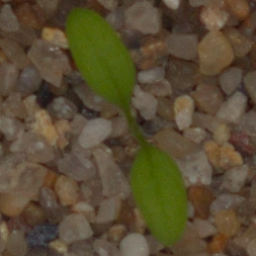

Actaul Class:  Common Chickweed
Predicted Class: Common Chickweed with Percent Confidence:19.742976129055023
Correct Prediction



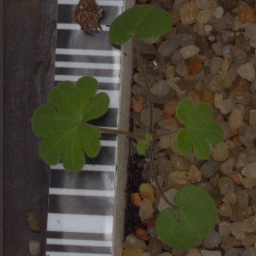

Actaul Class:  Small-flowered Cranesbill
Predicted Class: Small-flowered Cranesbill with Percent Confidence:19.24266368150711
Correct Prediction



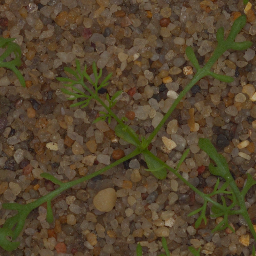

Actaul Class:  Scentless Mayweed
Predicted Class: Scentless Mayweed with Percent Confidence:18.97287517786026
Correct Prediction



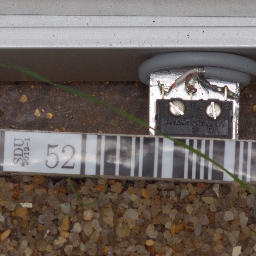

Actaul Class:  Black-grass
Predicted Class: Black-grass with Percent Confidence:13.089537620544434
Correct Prediction



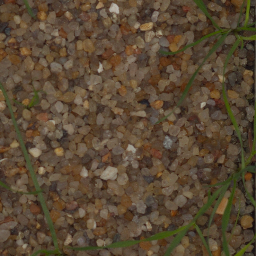

Actaul Class:  Loose Silky-bent
Predicted Class: Loose Silky-bent with Percent Confidence:18.648840487003326
Correct Prediction



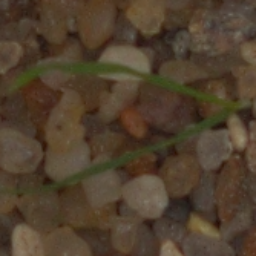

Actaul Class:  Loose Silky-bent
Predicted Class: Loose Silky-bent with Percent Confidence:19.694331288337708
Correct Prediction



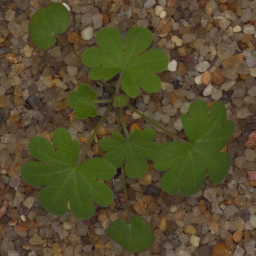

Actaul Class:  Small-flowered Cranesbill
Predicted Class: Small-flowered Cranesbill with Percent Confidence:19.460536539554596
Correct Prediction



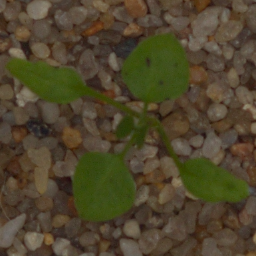

Actaul Class:  Common Chickweed
Predicted Class: Common Chickweed with Percent Confidence:19.43856030702591
Correct Prediction



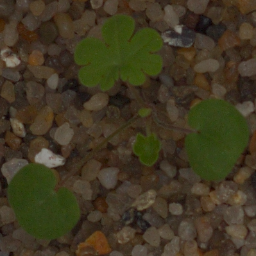

Actaul Class:  Small-flowered Cranesbill
Predicted Class: Small-flowered Cranesbill with Percent Confidence:18.37284415960312
Correct Prediction



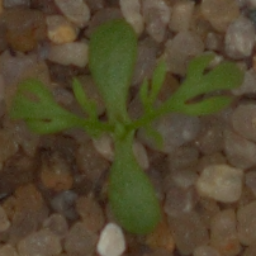

Actaul Class:  Scentless Mayweed
Predicted Class: Scentless Mayweed with Percent Confidence:19.71810907125473
Correct Prediction


In [95]:
predictions_val = model.predict(val)

for images,labels in val.take(1):
    for i in range(10):
        score = softmax( predictions_val[i] )
        fig = px.imshow( images[i] )
        fig.update_layout(width=500,title=class_names[labels[i]])
        fig.show()
        print( 'Actaul Class: ', class_names[labels[i]] )
        print('Predicted Class: {} with Percent Confidence:{}'.format(class_names[np.argmax(score)], 100 * np.max(score)))
        if class_names[labels[i]] != class_names[np.argmax(score)] :
            print("Incorrect Prediction")
        else:
            print('Correct Prediction')

In [96]:
model.save('./Step_By_Step_Method_Model')

***
***
***

## Creating Some Useful Functions

In [97]:
# Plotting Loss vs epochs graph, Accuaracy vs epochs graph
def Plot_Loss_Accuracy( history ):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.linspace(1,15,15)
    epochs


    fig = go.Figure(data=go.Scatter( x=epochs, y=loss, name='loss' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_loss, name='val_loss' ) )
    fig.update_layout( title="Loss", xaxis_title='epochs' )
    fig.show()


    fig = go.Figure(data=go.Scatter(x=epochs, y=accuracy, name='accuracy' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_accuracy, name='val_accuracy' ) )
    fig.update_layout( title="Accuracy",xaxis_title='epochs' )
    fig.show()


In [98]:
# Displaying Images in Validation/Test Set, Model Predictions and Confidence Level
def Prediction_Results( model, data, no_of_images):
    predictions = model.predict(data)

    for images,labels in data.take(1):
        for i in range(no_of_images):
            score = softmax( predictions[i] )
            fig = px.imshow( images[i] )
            fig.update_layout(width=500,title=class_names[labels[i]])
            fig.show()
            print( 'Actaul Class: ', class_names[labels[i]] )
            print('Predicted Class: {} with Percent Confidence:{}'.format(class_names[np.argmax(score)], 100 * np.max(score)))
            if class_names[labels[i]] == class_names[np.argmax(score)] :
                print("Correct Prediction")
            else:
                print('Incorrect Prediction')

***
***

# Using Keras Tuner

#### Trial 1) Tuning Filter and Units

In [100]:
def hypertuning_model(hp):
    model = Sequential()
        
    model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
    model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
    model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
    model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
    model.add( layers.RandomContrast(0.2) )

    model.add( Conv2D( hp.Choice('filters',[8,16,24,32,64,72,80]),kernel_size=3,activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D())
    model.add( Dropout(0.1))
    
    model.add( Conv2D( hp.Choice('filters',[8,16,24,32,64,72,80]),kernel_size=3,activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D()  )                   
    model.add( Dropout(0.1))
    
    model.add( Flatten() )
    model.add( Dense( hp.Int('units', min_value=32, max_value=512, step=32), activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout(0.2))

    model.add( Dense( units=12 ,activation='softmax') )
    
    model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )
    
    return model

hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss', max_epochs=20, factor=3,seed=10 )

call_back = EarlyStopping(monitor='val_loss',patience=2)
hyper_tuner_model.search( train, validation_data=val, epochs=15, callbacks=[call_back] )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
print( best_hyperparameters.values )
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
# Save the entire model as a SavedModel.
n_best_models.save('gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/tunned_model_1')
n_best_models.summary()

Trial 30 Complete [00h 03m 07s]
val_loss: 0.9116196036338806

Best val_loss So Far: 0.7306355834007263
Total elapsed time: 00h 34m 11s
{'filters': 24, 'units': 320, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
 rand

In [101]:
# # Output :--------------

# Trial 30 Complete [00h 03m 07s]
# val_loss: 0.9116196036338806

# Best val_loss So Far: 0.7306355834007263
# Total elapsed time: 00h 34m 11s
# {'filters': 24, 'units': 320, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
# Model: "sequential"

#### Trail 2: Choosing Filters, Units, Dropout Factors

In [102]:
def hypertuning_model(hp):
    model = Sequential()
        
    model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
    model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
    model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
    model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
    model.add( layers.RandomContrast(0.2) )

    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16),kernel_size=3,
                       #hp.Choice('kernel_size',[3,5]),
                       #hp.Choice('padding',values=['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( # hp.Choice('padding',['same','valid']),
                             #hp.Choice('strides', [1,2] )
                             ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))    
    
    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16),kernel_size=3,
                       #hp.Choice('kernel_size',[3,5]),
                       #hp.Choice('padding',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( # hp.Choice('padding' , ['same','valid']),
                             # hp.Choice('strides', [1,2] )
                             ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Flatten() )
    model.add( Dense( hp.Int('units', min_value=96,max_value=416, step=32), activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Dense( units=12 ,activation='softmax') )
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )
    
    return model



hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss', max_epochs=20, factor=3,seed=10 )


call_back = EarlyStopping(monitor='val_loss',patience=2)
hyper_tuner_model.search( train, validation_data=val, epochs=15, callbacks=[call_back] )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
n_best_models.summary()

final_model = hyper_tuner_model.hypermodel.build( best_hyperparameters )
history = final_model.fit( train, validation_data=val,epochs=15 )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
print( best_hyperparameters.values )
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
# Save the entire model as a SavedModel.
n_best_models.save('gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/tunned_model_2')
n_best_models.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 random_flip (RandomFlip)    (None, 256, 256, 3)       0         


 random_rotation (RandomRota  (None, 256, 256, 3)      0         


 tion)                                                           


 random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 230, 230, 3)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 228, 228, 24)      672       
                                                                 
 batch_normalization (BatchN  (None, 228, 228, 24)     96        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 114, 114, 24)     0         
 )                                                               
                                                                 
 dropout (

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 230, 230, 3)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 228, 228, 24)      6

In [103]:
# # Output; ----------------------------
# {'filters': 88, 'kernel_size': 3, 'strides': 2, 'rate': 0.0, 'units': 224, 'optimizer': 'sgd', 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}

#### Trail 3: Choosing Filters, Units, Dropout Rates and Kernel Size

In [104]:
def hypertuning_model(hp):
    model = Sequential()
        
    model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
    model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
    model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
    model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
    model.add( layers.RandomContrast(0.2) )

    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16),# kernel_size=3,
                       hp.Choice('kernel_size',[3,5]),
                       #hp.Choice('padding',values=['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( # hp.Choice('padding',['same','valid']),
                             #hp.Choice('strides', [1,2] )
                             ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))    
    
    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size',[3,5]),
                       #hp.Choice('padding',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( # hp.Choice('padding' , ['same','valid']),
                             # hp.Choice('strides', [1,2] )
                             ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size',[3,5]),
                       #hp.Choice('padding',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( # hp.Choice('padding' , ['same','valid']),
                             # hp.Choice('strides', [1,2] )
                             ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Flatten() )
    model.add( Dense( hp.Int('units', min_value=96,max_value=416, step=32), activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Dense( units=12 ,activation='softmax') )
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )
    
    return model

hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss', max_epochs=20, factor=3,seed=10 )

call_back = EarlyStopping(monitor='val_loss',patience=2)
hyper_tuner_model.search( train, validation_data=val, epochs=15, callbacks=[call_back] )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
n_best_models.summary()

final_model = hyper_tuner_model.hypermodel.build( best_hyperparameters )
history = final_model.fit( train, validation_data=val,epochs=15 )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
print( best_hyperparameters.values )
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
# Save the entire model
n_best_models.save('gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/tunned_model_2_3Layer')
n_best_models.summary()

ValueError: ignored

In [ ]:
# # Output:-------------------------------------------
# {'filters': 72, 'kernel_size': 3, 'rate': 0.2, 'units': 256, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
# WARNING:tensorflow:Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.beta_1
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.beta_2
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.decay
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.learning_rate
# INFO:tensorflow:Assets written to: gdrive/My Drive/Personal Data Science Projects/Cotton Plant Disease Classification/tunned_model_2_3Layer/assets
# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
#  random_rotation (RandomRota  (None, 256, 256, 3)      0         
#  tion)                                                           
                                                                 
#  random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
#  random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
#  random_contrast (RandomCont  (None, 230, 230, 3)      0         
#  rast)                                                           
                                                                 
#  conv2d (Conv2D)             (None, 228, 228, 72)      2016      
                                                                 
#  batch_normalization (BatchN  (None, 228, 228, 72)     288       
#  ormalization)                                                   
                                                                 
#  max_pooling2d (MaxPooling2D  (None, 114, 114, 72)     0         
#  )                                                               
                                                                 
#  dropout (Dropout)           (None, 114, 114, 72)      0         
                                                                 
#  conv2d_1 (Conv2D)           (None, 112, 112, 72)      46728     
                                                                 
#  batch_normalization_1 (Batc  (None, 112, 112, 72)     288       
#  hNormalization)                                                 
                                                                 
#  max_pooling2d_1 (MaxPooling  (None, 56, 56, 72)       0         
#  2D)                                                             
                                                                 
#  dropout_1 (Dropout)         (None, 56, 56, 72)        0         
                                                                 
#  conv2d_2 (Conv2D)           (None, 54, 54, 72)        46728     
                                                                 
#  batch_normalization_2 (Batc  (None, 54, 54, 72)       288       
#  hNormalization)                                                 
                                                                 
#  max_pooling2d_2 (MaxPooling  (None, 27, 27, 72)       0         
#  2D)                                                             
                                                                 
#  dropout_2 (Dropout)         (None, 27, 27, 72)        0         
                                                                 
#  flatten (Flatten)           (None, 52488)             0         
                                                                 
#  dense (Dense)               (None, 256)               13437184  
                                                                 
#  batch_normalization_3 (Batc  (None, 256)              1024      
#  hNormalization)                                                 
                                                                 
#  dropout_3 (Dropout)         (None, 256)               0         
                                                                 
#  dense_1 (Dense)             (None, 4)                 1028      
                                                                 
# =================================================================
# Total params: 13,535,572
# Trainable params: 13,534,628
# Non-trainable params: 944
# _________________________________________________________________

#### Trail 4: Choosing Filters, Units, Dropout Rates, Kernel Size, Strides and Padding 

In [ ]:
def hypertuning_model(hp):
    model = Sequential()
        
    model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
    model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
    model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
    model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
    model.add( layers.RandomContrast(0.2) )

    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16),# kernel_size=3,
                       hp.Choice('kernel_size',[3,5]), hp.Choice('strides', [1,2] ),
                       hp.Choice('padding',values=['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D())
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))    
    
    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size',[3,5]), hp.Choice('strides', [1,2] ),
                       hp.Choice('padding',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Conv2D( hp.Int('filters', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size',[3,5]), hp.Choice('strides', [1,2]),
                       hp.Choice('padding',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( ))
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Flatten() )
    model.add( Dense( hp.Int('units', min_value=96,max_value=416, step=32), activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Dense( units=12 ,activation='softmax') )
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )
    
    return model

hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss', max_epochs=20, factor=3,seed=10 )

call_back = EarlyStopping(monitor='val_loss',patience=2)
hyper_tuner_model.search( train, validation_data=val, epochs=15, callbacks=[call_back] )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
n_best_models.summary()

final_model = hyper_tuner_model.hypermodel.build( best_hyperparameters )
history = final_model.fit( train, validation_data=val,epochs=15 )

best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
print( best_hyperparameters.values )
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
# Save the entire model
n_best_models.save('gdrive/My Drive/Personal Data Science Projects/Plant Seedling Image Classification/tunned_model_3_3Layer')
n_best_models.summary()

In [ ]:
# Output: -------------------------------------
# {'filters': 40, 'kernel_size': 3, 'strides': 2, 'padding': 'same', 'rate': 0.001, 'units': 288, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}
# WARNING:tensorflow:Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.iter
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.beta_1
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.beta_2
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.decay
# WARNING:tensorflow:Value in checkpoint could not be found in the restored object: (root).optimizer.learning_rate
# INFO:tensorflow:Assets written to: gdrive/My Drive/Personal Data Science Projects/Cotton Plant Disease Classification/tunned_model_3_3Layer/assets
# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
#  random_rotation (RandomRota  (None, 256, 256, 3)      0         
#  tion)                                                           
                                                                 
#  random_crop (RandomCrop)    (None, 230, 230, 3)       0         
                                                                 
#  random_zoom (RandomZoom)    (None, 230, 230, 3)       0         
                                                                 
#  random_contrast (RandomCont  (None, 230, 230, 3)      0         
#  rast)                                                           
                                                                 
#  conv2d (Conv2D)             (None, 115, 115, 40)      1120      
                                                                 
#  batch_normalization (BatchN  (None, 115, 115, 40)     160       
#  ormalization)                                                   
                                                                 
#  max_pooling2d (MaxPooling2D  (None, 57, 57, 40)       0         
#  )                                                               
                                                                 
#  dropout (Dropout)           (None, 57, 57, 40)        0         
                                                                 
#  conv2d_1 (Conv2D)           (None, 29, 29, 40)        14440     
                                                                 
#  batch_normalization_1 (Batc  (None, 29, 29, 40)       160       
#  hNormalization)                                                 
                                                                 
#  max_pooling2d_1 (MaxPooling  (None, 14, 14, 40)       0         
#  2D)                                                             
                                                                 
#  dropout_1 (Dropout)         (None, 14, 14, 40)        0         
                                                                 
#  conv2d_2 (Conv2D)           (None, 7, 7, 40)          14440     
                                                                 
#  batch_normalization_2 (Batc  (None, 7, 7, 40)         160       
#  hNormalization)                                                 
                                                                 
#  max_pooling2d_2 (MaxPooling  (None, 3, 3, 40)         0         
#  2D)                                                             
                                                                 
#  dropout_2 (Dropout)         (None, 3, 3, 40)          0         
                                                                 
#  flatten (Flatten)           (None, 360)               0         
                                                                 
#  dense (Dense)               (None, 288)               103968    
                                                                 
#  batch_normalization_3 (Batc  (None, 288)              1152      
#  hNormalization)                                                 
                                                                 
#  dropout_3 (Dropout)         (None, 288)               0         
                                                                 
#  dense_1 (Dense)             (None, 4)                 1156      
                                                                 
# =================================================================
# Total params: 136,756
# Trainable params: 135,940
# Non-trainable params: 816
# _________________________________________________________________

## Final Keras Tuner Model

Here, filters, kernel_size, padding, rate is different for different layers

In [ ]:
def hypertuning_model(hp):
    model = Sequential()
        
    model.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
    model.add( layers.experimental.preprocessing.RandomRotation(0.2) )
    model.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
    model.add( layers.experimental.preprocessing.RandomZoom(0.2) )
    model.add( layers.RandomContrast(0.2) )

    model.add( Conv2D( hp.Int('filters1', min_value=24, max_value=104, step=16),# kernel_size=3,
                       hp.Choice('kernel_size1',[3,5]), hp.Choice('strides1', [1,2] ),
                       hp.Choice('padding1',values=['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D())
    model.add( Dropout( hp.Choice('rate1',[0.001,0.1,0.2,0.3] )))    
    
    model.add( Conv2D( hp.Int('filters2', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size2',[3,5]), hp.Choice('strides2', [1,2] ),
                       hp.Choice('padding2',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( ))
    model.add( Dropout( hp.Choice('rate2',[0.001,0.1,0.2,0.3] )))

    model.add( Conv2D( hp.Int('filters3', min_value=24, max_value=104, step=16), # kernel_size=3,
                       hp.Choice('kernel_size3',[3,5]), hp.Choice('strides3', [1,2]),
                       hp.Choice('padding3',['same','valid'] ),
                       activation='relu') )
    model.add( BatchNormalization() )
    model.add( MaxPooling2D( ))
    model.add( Dropout( hp.Choice('rate3',[0.001,0.1,0.2,0.3] )))

    model.add( Flatten() )
    model.add( Dense( hp.Int('units', min_value=96,max_value=416, step=32), activation='relu' ) )
    model.add( BatchNormalization() )
    model.add( Dropout( hp.Choice('rate',[0.001,0.1,0.2,0.3] )))

    model.add( Dense( units=12 ,activation='softmax') )
    
    model.compile(hp.Choice('optimizer',['adam','rmsprop']), loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'] )
    
    return model

In [ ]:
hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss', max_epochs=20, factor=3,seed=10 )

In [ ]:
call_back = EarlyStopping(monitor='val_loss',patience=2)
hyper_tuner_model.search( train, validation_data=val, epochs=15, callbacks=[call_back] )

In [ ]:
best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

In [ ]:
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
n_best_models.summary()

In [ ]:
final_model = hyper_tuner_model.hypermodel.build( best_hyperparameters )
history = final_model.fit( train, validation_data=val,epochs=15 )

In [ ]:
final_model.save('./Keras_Tuner_Method_Model')

In [ ]:
Plot_Loss_Accuracy( history=history )

In [ ]:
Prediction_Results( final_model, test, 10 )

***
***

# Transfer Learning

## Trasnfer Learning using ResNet50

In [105]:
import tensorflow as tf
from tensorflow.keras import layers
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Rescaling
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.nn import softmax
# load_img(r'C:\Users\shirs\Desktop\Image Classification\Cotton Disease Prediction Project-Youtube Krish Naik\train\fresh cotton leaf\d (88)_iaip.jpg')

In [106]:
model_ResNet50 = Sequential()
model_ResNet50.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model_ResNet50.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model_ResNet50.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model_ResNet50.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model_ResNet50.add( layers.RandomContrast(0.2) )
pretrained_model = tf.keras.applications.ResNet50( include_top=False,classes=4,weights='imagenet' )
pretrained_model.trainable = False
model_ResNet50.add( pretrained_model )
model_ResNet50.add( Flatten() )
model_ResNet50.add( Dense( units=256, activation='relu'))
model_ResNet50.add( BatchNormalization() )
# model_ResNet50.add( Dropout(0.1) )
model_ResNet50.add( Dense( units=256, activation='relu'))
model_ResNet50.add( Dense( units=12, activation='softmax' ) )
model_ResNet50.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_crop_1 (RandomCrop)  (None, 230, 230, 3)       0         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 230, 230, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 230, 230, 3)      0         
 ntrast)                                                         
                                                       

In [107]:
model_ResNet50.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_ResNet50.fit( train, validation_data=val, epochs=10 )

Epoch 1/10
139/139 [==============================] - 28s 167ms/step - loss: 0.8957 - accuracy: 0.7046 - val_loss: 0.6328 - val_accuracy: 0.7940
Epoch 2/10
139/139 [==============================] - 21s 153ms/step - loss: 0.4670 - accuracy: 0.8312 - val_loss: 0.4393 - val_accuracy: 0.8455
Epoch 3/10
139/139 [==============================] - 21s 154ms/step - loss: 0.4070 - accuracy: 0.8470 - val_loss: 0.3978 - val_accuracy: 0.8717
Epoch 4/10
139/139 [==============================] - 21s 154ms/step - loss: 0.3403 - accuracy: 0.8784 - val_loss: 0.4682 - val_accuracy: 0.8401
Epoch 5/10
139/139 [==============================] - 21s 153ms/step - loss: 0.3118 - accuracy: 0.8815 - val_loss: 0.3702 - val_accuracy: 0.8762
Epoch 6/10
139/139 [==============================] - 21s 153ms/step - loss: 0.2895 - accuracy: 0.8944 - val_loss: 0.3592 - val_accuracy: 0.8753
Epoch 7/10
139/139 [==============================] - 21s 154ms/step - loss: 0.2652 - accuracy: 0.9009 - val_loss: 0.3674 - val_ac

In [108]:
model_ResNet50.save('./TransferLearning_ResNet50_Model')

In [109]:
Plot_Loss_Accuracy( history=history )

In [111]:
# Prediction_Results( model_ResNet50, test, 10 )

## Transfer Learning using MobileNetV2

In [112]:
model_MobileNetV2 = Sequential()
pretrained_model = tf.keras.applications.MobileNetV2( include_top=False, classes=4, weights='imagenet' )
pretrained_model.trainable = False
model_MobileNetV2.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model_MobileNetV2.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model_MobileNetV2.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model_MobileNetV2.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model_MobileNetV2.add( layers.RandomContrast(0.2) )
model_MobileNetV2.add( pretrained_model )
model_MobileNetV2.add( Flatten() )
model_MobileNetV2.add( Dense( units=512, activation='relu'))
model_MobileNetV2.add( BatchNormalization())
model_MobileNetV2.add( Dense( units=256, activation='relu'))
model_MobileNetV2.add( Dense( units=12, activation='softmax' ) )
model_MobileNetV2.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_crop_2 (RandomCrop)  (None, 230, 230, 3)       0         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 230, 230, 3)       0         
                                                                 
 random_contrast_2 (RandomCo  (None, 230, 230, 3)      0         
 ntrast)                                                         
                                                         

In [113]:
model_MobileNetV2.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'])
history = model_MobileNetV2.fit( train, validation_data=val, epochs=20 )

Epoch 1/20
139/139 [==============================] - ETA: 0s - loss: 1.6186 - accuracy: 0.4648 - sparse_categorical_crossentropy: 1.6186

139/139 [==============================] - 16s 89ms/step - loss: 1.6186 - accuracy: 0.4648 - sparse_categorical_crossentropy: 1.6186 - val_loss: 2.9088 - val_accuracy: 0.3406 - val_sparse_categorical_crossentropy: 2.9088
Epoch 2/20
139/139 [==============================] - 10s 72ms/step - loss: 1.2261 - accuracy: 0.5727 - sparse_categorical_crossentropy: 1.2261 - val_loss: 1.5342 - val_accuracy: 0.4860 - val_sparse_categorical_crossentropy: 1.5342
Epoch 3/20
139/139 [==============================] - 10s 72ms/step - loss: 1.0717 - accuracy: 0.6200 - sparse_categorical_crossentropy: 1.0717 - val_loss: 1.2919 - val_accuracy: 0.5565 - val_sparse_categorical_crossentropy: 1.2919
Epoch 4/20
139/139 [==============================] - 10s 71ms/step - loss: 1.0258 - accuracy: 0.6415 - sparse_categorical_crossentropy: 1.0258 - val_loss: 1.3958 - val_accuracy: 0.5402 - val_sparse_categorical_crossentropy: 1.3958
Epoch 5/20
139/139 [==============================] - 10s 70ms/step - loss: 0.9797 

In [114]:
model_MobileNetV2.save('./TransferLearning_MobileNetV2_Model')

In [115]:
Plot_Loss_Accuracy( history=history )

In [ ]:
# Prediction_Results( model_MobileNetV2, test, 10 )

## Transfer Learning using InceptionV3 Network

In [116]:
model_InceptionV3 = Sequential()
pretrained_model = tf.keras.applications.InceptionV3( include_top=False, classes=4, weights='imagenet' )
pretrained_model.trainable = False
model_InceptionV3.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model_InceptionV3.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model_InceptionV3.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model_InceptionV3.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model_InceptionV3.add( layers.RandomContrast(0.2) )
model_InceptionV3.add( pretrained_model )
model_InceptionV3.add( Flatten() )
model_InceptionV3.add( Dense( units=512, activation='relu'))
model_InceptionV3.add( BatchNormalization())
model_InceptionV3.add( Dense( units=256, activation='relu'))
model_InceptionV3.add( Dense( units=12, activation='softmax' ) )
model_InceptionV3.summary()

87924736/87910968 [==============================] - 2s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_crop_3 (RandomCrop)  (None, 230, 230, 3)       0         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 230, 230, 3)       0         
                                                                 
 random_contrast_3 (RandomCo  (None, 230, 230, 3)      0         
 ntrast)                                                         
                                                       

In [117]:
model_InceptionV3.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'])
history = model_InceptionV3.fit( train, validation_data=val, epochs=20 )

Epoch 1/20
139/139 [==============================] - 22s 122ms/step - loss: 2.3465 - accuracy: 0.2144 - sparse_categorical_crossentropy: 2.3465 - val_loss: 2.8511 - val_accuracy: 0.1762 - val_sparse_categorical_crossentropy: 2.8511
Epoch 2/20
139/139 [==============================] - 13s 97ms/step - loss: 2.0975 - accuracy: 0.2753 - sparse_categorical_crossentropy: 2.0975 - val_loss: 2.3034 - val_accuracy: 0.2665 - val_sparse_categorical_crossentropy: 2.3034
Epoch 3/20
139/139 [==============================] - 14s 98ms/step - loss: 2.0219 - accuracy: 0.2935 - sparse_categorical_crossentropy: 2.0219 - val_loss: 2.1327 - val_accuracy: 0.2773 - val_sparse_categorical_crossentropy: 2.1327
Epoch 4/20
139/139 [==============================] - 14s 98ms/step - loss: 1.9446 - accuracy: 0.3208 - sparse_categorical_crossentropy: 1.9446 - val_loss: 2.0261 - val_accuracy: 0.3180 - val_sparse_categorical_crossentropy: 2.0261
Epoch 5/20
139/139 [==============================] - 14s 98ms/step - l

In [118]:
model_InceptionV3.save('./TransferLearning_InceptionV3_Model')

In [119]:
Plot_Loss_Accuracy( history=history )

In [120]:
# Prediction_Results( model_InceptionV3, test, 10 )

## Transfer Learning using VGG16 Network

In [121]:
model_VGG16 = Sequential()
pretrained_model = tf.keras.applications.VGG16( include_top=False, classes=4, weights='imagenet' )
pretrained_model.trainable = False
model_VGG16.add( layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)))
model_VGG16.add( layers.experimental.preprocessing.RandomRotation(0.2) )
model_VGG16.add( layers.experimental.preprocessing.RandomCrop(width=230,height=230) )
model_VGG16.add( layers.experimental.preprocessing.RandomZoom(0.2) )
model_VGG16.add( layers.RandomContrast(0.2) )
model_VGG16.add( pretrained_model )
model_VGG16.add( Flatten() )
model_VGG16.add( Dense( units=512, activation='relu'))
model_VGG16.add( BatchNormalization())
model_VGG16.add( Dense( units=256, activation='relu'))
model_VGG16.add( Dense( units=12, activation='softmax' ) )
model_VGG16.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_crop_4 (RandomCrop)  (None, 230, 230, 3)       0         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 230, 230, 3)       0         
                                                                 
 random_contrast_4 (RandomCo  (None, 230, 230, 3)      0         
 ntrast)                                                         
                                                       

In [122]:
model_VGG16.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','SparseCategoricalCrossentropy'])
history = model_VGG16.fit( train, validation_data=val, epochs=20 )

Epoch 1/20
139/139 [==============================] - 38s 241ms/step - loss: 1.0382 - accuracy: 0.6606 - sparse_categorical_crossentropy: 1.0382 - val_loss: 0.9404 - val_accuracy: 0.7145 - val_sparse_categorical_crossentropy: 0.9404
Epoch 2/20
139/139 [==============================] - 30s 215ms/step - loss: 0.5979 - accuracy: 0.7881 - sparse_categorical_crossentropy: 0.5979 - val_loss: 0.5682 - val_accuracy: 0.8248 - val_sparse_categorical_crossentropy: 0.5682
Epoch 3/20
139/139 [==============================] - 30s 215ms/step - loss: 0.5197 - accuracy: 0.8082 - sparse_categorical_crossentropy: 0.5197 - val_loss: 0.4947 - val_accuracy: 0.8347 - val_sparse_categorical_crossentropy: 0.4947
Epoch 4/20
139/139 [==============================] - 30s 217ms/step - loss: 0.4772 - accuracy: 0.8254 - sparse_categorical_crossentropy: 0.4772 - val_loss: 0.5568 - val_accuracy: 0.8148 - val_sparse_categorical_crossentropy: 0.5568
Epoch 5/20
139/139 [==============================] - 30s 217ms/step

In [123]:
model_VGG16.save('./TransferLearning_VGG16_Model')

In [124]:
Plot_Loss_Accuracy( history=history )

In [125]:
# Prediction_Results( model_VGG16, test, 10 )

### Best Validation Accuracy is provided by ResNet50 Model
### Train Accuracy of VGG16 Model is also good but it takes very long time to complete the training ( 10 minutes per epochs )


***
***

In [126]:
final_model = tf.keras.models.load_model('./TransferLearning_ResNet50_Model' )

In [127]:
# Prediction_Results( model_ResNet50, test, 30 )

NameError: ignored